In [ ]:
from amplpy import AMPL

import sys
import os
project_root = r"G:\Code-Used-In-Classes\Linear Programing\Examples From Book Codes"
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from Functions.solve_ampl_model import solve_ampl_model


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
model = solve_ampl_model('steel3.mod', 'steel3.dat')
Time = model.getConstraint('Time')
t = Time.getValues().toPandas()
Make = model.getVariable('Make')
m = Make.getValues('rc').toPandas()
print(t)
print(m)

Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 194828.5714
1 simplex iteration
Total Profit: 194828.57142857142

Production plan (tons per product):
bands: 6000.0 tons
coils: 500.0 tons
plate: 1028.571428571428 tons

Production plan as table:
          Make.val
bands  6000.000000
coils   500.000000
plate  1028.571429
   Time.dual
0       4640
        Make.rc
bands  1.800000
coils -3.142857
plate  0.000000


Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 190071.4286
2 simplex iterations
Total Profit: 190071.42857142858

Production plan (tons per product):
bands: 3357.142857142856 tons
coils: 500.0 tons
plate: 3142.857142857144 tons

Production plan as table:
          Make.val
bands  3357.142857
coils   500.000000
plate  3142.857143
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 191871.4286
2 simplex iterations
Total Profit: 191871.42857142855

Production plan (tons per product):
bands: 4357.142857142855 tons
coils: 500.0 tons
plate: 2342.857142857144 tons

Production plan as table:
          Make.val
bands  4357.142857
coils   500.000000
plate  2342.857143
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 193671.4286
2 simplex iterations
Total Profit: 193671.42857142852

Production plan (tons per product):
bands: 5357.142857142855 tons
coils: 500.0 tons
plate: 1542.857142857144 tons

Production plan as table:
          Make.val
bands  5357.142857
coils   500.000

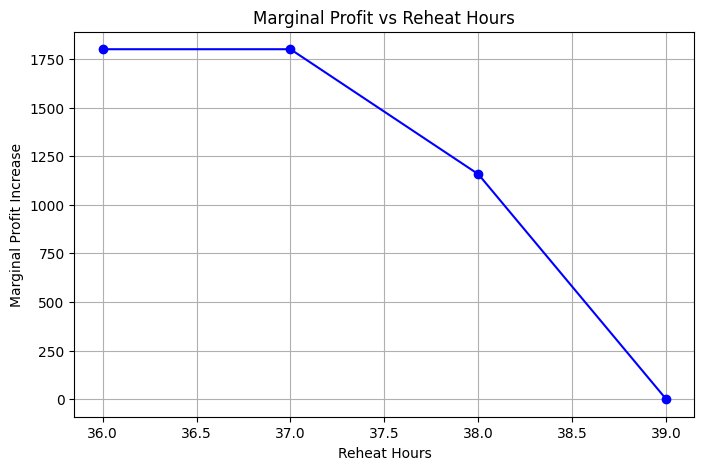

In [ ]:
model = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=35)
model1 = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=36)
model2 = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=37)
model3 = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=38)
model4 = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=39) 
P0 = model.getObjective('Total_Profit')
P1 = model1.getObjective('Total_Profit')
P2 = model2.getObjective('Total_Profit')
P3 = model3.getObjective('Total_Profit')
P4 = model4.getObjective('Total_Profit')  
P0val = P0.value()
P1val = P1.value()
P2val = P2.value()
P3val = P3.value()
P4val = P4.value() 
P1_P0 = P1val - P0val
P2_P1 = P2val - P1val
P3_P2 = P3val - P2val
P4_P3 = P4val - P3val  
print(f"Profit P1 - P0: {P1_P0}")
print(f"Profit P2 - P1: {P2_P1}")
print(f"Profit P3 - P2: {P3_P2}")
print(f"Profit P4 - P3: {P4_P3}")
reheat_hours = [36, 37, 38, 39]  
marginal_profit = [P1_P0, P2_P1, P3_P2, P4_P3]
plt.figure(figsize=(8,5))
plt.plot(reheat_hours, marginal_profit, marker='o', linestyle='-', color='blue')
plt.title("Marginal Profit vs Reheat Hours")
plt.xlabel("Reheat Hours")
plt.ylabel("Marginal Profit Increase")
plt.grid(True)
plt.show()



Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 187791.6667
3 simplex iterations
Total Profit: 187791.66666666666

Production plan (tons per product):
bands: 2541.666666666666 tons
coils: 758.3333333333338 tons
plate: 3500.0 tons

Production plan as table:
          Make.val
bands  2541.666667
coils   758.333333
plate  3500.000000
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 189125
3 simplex iterations
Total Profit: 189125.0

Production plan (tons per product):
bands: 2875.0 tons
coils: 525.0000000000002 tons
plate: 3500.0 tons

Production plan as table:
       Make.val
bands    2875.0
coils     525.0
plate    3500.0
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 190071.4286
2 simplex iterations
Total Profit: 190071.42857142858

Production plan (tons per product):
bands: 3357.142857142856 tons
coils: 500.0 tons
plate: 3142.857142857144 tons

Production plan as table:
          Make.val
bands  3357.142857
coils   500.000000
plate  3142.857143
Gurobi 12.0.3

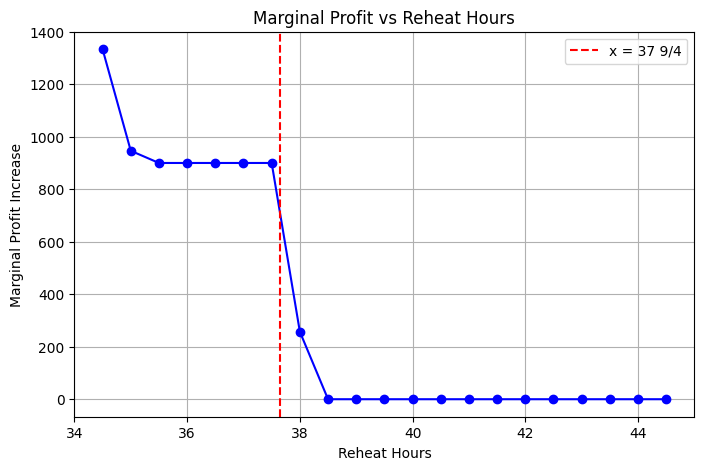

In [ ]:

reheat_hours_values = np.arange(34, 45, .5) 

profits = []
for h in reheat_hours_values:
    model = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=h)
    P = model.getObjective('Total_Profit')
    profits.append(P.value())

marginal_profit = np.diff(profits)  
marginal_hours = reheat_hours_values[1:] 


plt.figure(figsize=(8,5))
plt.plot(marginal_hours, marginal_profit, marker='o', linestyle='-', color='blue')
plt.title("Marginal Profit vs Reheat Hours")
plt.xlabel("Reheat Hours")
plt.ylabel("Marginal Profit Increase")
plt.grid(True)
plt.axvline(x=37.643, color='red', linestyle='--', label='x = 37 9/4')

plt.legend()
plt.show()


[WARNING] 
	presolve: constraint Time['reheat'] cannot hold:
		body <= 11 cannot be >= 11.25; difference = -0.25


Total Profit: 0.0

Production plan (tons per product):
bands: 0 tons
coils: 0 tons
plate: 0 tons

Production plan as table:
       Make.val
bands         0
coils         0
plate         0
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 63250
0 simplex iterations
Total Profit: 63250.0

Production plan (tons per product):
bands: 1000 tons
coils: 550 tons
plate: 750 tons

Production plan as table:
       Make.val
bands      1000
coils       550
plate       750
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 66250
0 simplex iterations
Total Profit: 66250.0

Production plan (tons per product):
bands: 1000 tons
coils: 650 tons
plate: 750 tons

Production plan as table:
       Make.val
bands      1000
coils       650
plate       750
Gurobi 12.0.3:Gurobi 12.0.3: optimal solution; objective 69250
0 simplex iterations
Total Profit: 69250.0

Production plan (tons per product):
bands: 1000 tons
coils: 750 tons
plate: 750 tons

Production plan as table:
       Make.val
bands      

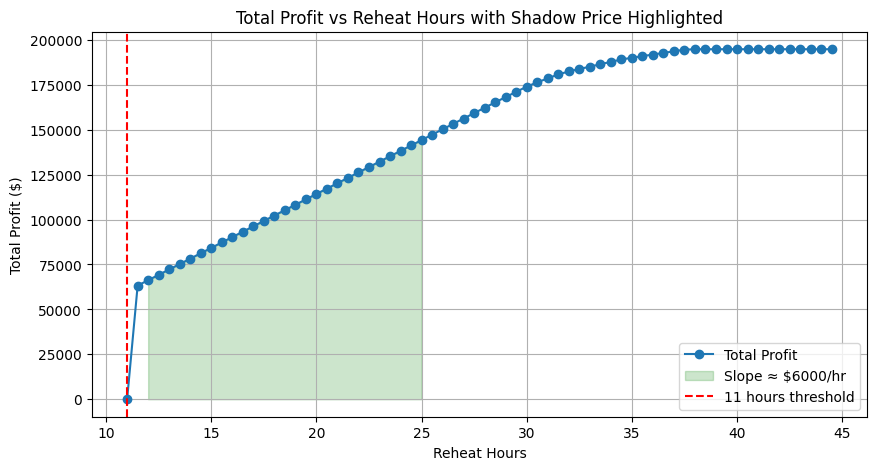

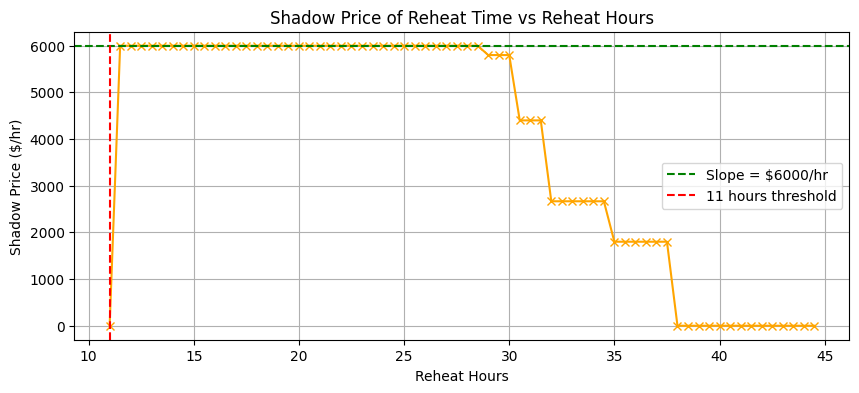

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Reheat hours range, including below 12 hours
reheat_hours_values = np.arange(11, 45, 0.5)
profits = []
slopes = []

for h in reheat_hours_values:
    model = solve_ampl_model('steel4.mod', 'steel4.dat', reheat_hours=h)
    
    # Total profit
    profit = model.getObjective('Total_Profit').value()
    profits.append(profit)
    
    # Shadow price of reheat time
    Time = model.getConstraint('Time')
    reheat_constraint = Time['reheat']
    shadow_price = reheat_constraint.dual()   # $/hour
    slopes.append(shadow_price)

profits = np.array(profits)
slopes = np.array(slopes)

# Plot total profit vs reheat hours
plt.figure(figsize=(10,5))
plt.plot(reheat_hours_values, profits, marker='o', linestyle='-', label='Total Profit')

# Highlight region where slope = 6000
mask = (reheat_hours_values >= 12) & (reheat_hours_values <= 25)
plt.fill_between(reheat_hours_values[mask], profits[mask], alpha=0.2, color='green', label='Slope ≈ $6000/hr')

plt.axvline(x=11, color='red', linestyle='--', label='11 hours threshold')
plt.xlabel('Reheat Hours')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit vs Reheat Hours with Shadow Price Highlighted')
plt.grid(True)
plt.legend()
plt.show()

# Optional: plot slope (shadow price) vs hours
plt.figure(figsize=(10,4))
plt.plot(reheat_hours_values, slopes, marker='x', linestyle='-', color='orange')
plt.axhline(6000, color='green', linestyle='--', label='Slope = $6000/hr')
plt.axvline(x=11, color='red', linestyle='--', label='11 hours threshold')
plt.xlabel('Reheat Hours')
plt.ylabel('Shadow Price ($/hr)')
plt.title('Shadow Price of Reheat Time vs Reheat Hours')
plt.grid(True)
plt.legend()
plt.show()

